In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [60]:
job="data_scientist"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [61]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,ACT2HIRE,python data scientist,Remote,2800000.0,"Data analysis skills, English, Analysis skills...",NaN,Data Scientist
1,Avathon,Data Scientist (Supply Chain),Bengaluru,750000.0,"TensorFlow, MATLAB, Procurement, Supply chain, R",3.1,Data Scientist
2,Wise Monk,Data Scientist,Gurgaon,0.0,"TensorFlow, Image processing, Big data, Data a...",4.0,Data Scientist
3,Krea University,Assistant Professor / Associate Professor / Pr...,India,0.0,"Computer science, Machine learning, Data scien...",3.8,Data Scientist
4,Aganitha AI,Full Stack Data Scientist,Hyderābād,4800000.0,"TensorFlow, CI/CD, Image processing, Computer ...",3.9,Data Scientist


In [62]:
df.isnull().sum()

company_name              0
job_role                  0
job_location              0
salary_pa                 0
skills                    0
company_rating           60
standardized_job_role     0
dtype: int64

In [63]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [64]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
2,Wise Monk,Data Scientist,Gurgaon,0.0,"TensorFlow, Image processing, Big data, Data a...",4.0,Data Scientist
3,Krea University,Assistant Professor / Associate Professor / Pr...,India,0.0,"Computer science, Machine learning, Data scien...",3.8,Data Scientist
8,Elsevier,Senior Data Scientist I,India,0.0,"TensorFlow, CI/CD, Azure, Data mining, DevOps",3.9,Data Scientist
9,Elevate Services,Senior Manager Data Science (India),India,0.0,"TensorFlow, Azure, Big data, Research, AWS",3.7,Data Scientist
10,RELX,Senior Data Scientist I,India,0.0,"TensorFlow, CI/CD, Azure, Data mining, DevOps",4.1,Data Scientist
14,Voiant,Data Consultant,Remote,0.0,"Data analysis skills, Java, SQL, Communication...",3.8,Data Scientist
15,ADCI HYD 13 SEZ,"Data Engineer I, Business Data Technologies",Hyderābād,0.0,"Data modeling, Big data, Spark, Apache Hive, SQL",3.6,Data Scientist
17,Concentrix,Data Engineer,Remote,0.0,"Azure, Google Cloud Platform, Java, SQL, Datab...",4.0,Data Scientist
21,Google,"AI Safety Protections Data Scientist, Trust an...",Bengaluru,0.0,"R, Data analysis skills, Java, SQL, C++",4.3,Data Scientist
28,Wadhwani AI,Data Specialist,Delhi,0.0,"Computer science, Power BI, Data structures, R...",3.2,Data Scientist


### Filling the null values by replacing with average salary of company rating

In [66]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [67]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [68]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,ACT2HIRE,python data scientist,Remote,28.000000,"Data analysis skills, English, Analysis skills...",0.0,Data Scientist
1,Avathon,Data Scientist (Supply Chain),Bengaluru,7.500000,"TensorFlow, MATLAB, Procurement, Supply chain, R",3.1,Data Scientist
2,Wise Monk,Data Scientist,Gurgaon,12.470000,"TensorFlow, Image processing, Big data, Data a...",4.0,Data Scientist
3,Krea University,Assistant Professor / Associate Professor / Pr...,India,23.571429,"Computer science, Machine learning, Data scien...",3.8,Data Scientist
4,Aganitha AI,Full Stack Data Scientist,Hyderābād,48.000000,"TensorFlow, CI/CD, Image processing, Computer ...",3.9,Data Scientist
...,...,...,...,...,...,...,...
204,Drivetrain AI,Software Engineer (Data Engineering),Remote,25.750000,"Computer science, Big data, Spark, SQL, Data w...",4.8,Data Scientist
205,HSBC,Data Engineer/Senior Software Engineer,Hyderābād,7.500000,"DB2, Data structures, SQL, Agile, Communicatio...",3.9,Data Scientist
206,JPMorganChase,Software Engineer II Data Engineer,Hyderābād,8.500000,"CI/CD, Oracle, Software troubleshooting, Encry...",4.0,Data Scientist
207,Imurgence,Data Science/ ML /AI Technical Code Writer for...,Remote,12.470000,"Data science, AI",4.0,Data Scientist


In [69]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [70]:
df.describe()

,salary_lpa,company_rating
count,209.000000,209.000000
mean,13.185817,2.810526
std,10.693150,1.833918
min,0.780000,0.000000
25%,6.500000,0.000000
50%,8.900000,3.800000
75%,17.500000,4.100000
max,62.000000,5.000000


In [71]:
df.nunique()

company_name             179
job_role                 140
job_location              23
salary_lpa                73
skills                   197
company_rating            25
standardized_job_role      1
dtype: int64

In [72]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [74]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [75]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                Skill  Count
30                sql     68
24              azure     59
11           big data     44
18              spark     43
14   machine learning     36
..                ...    ...
108             linux      1
109            hadoop      1
110   cloud computing      1
111    load balancing      1
143    writing skills      1

[144 rows x 2 columns]


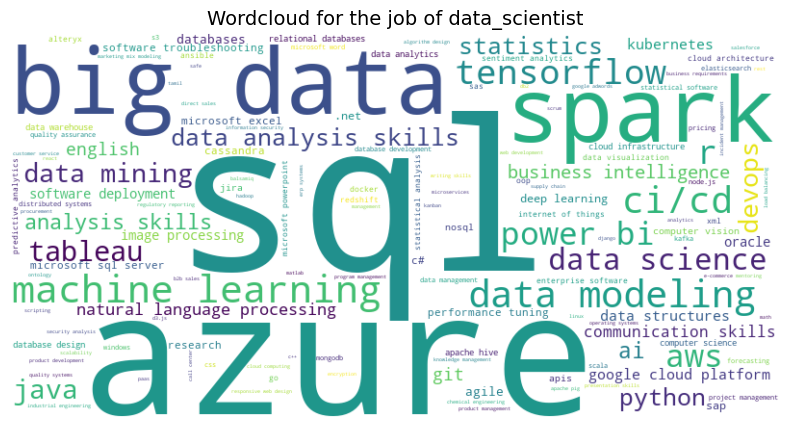

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


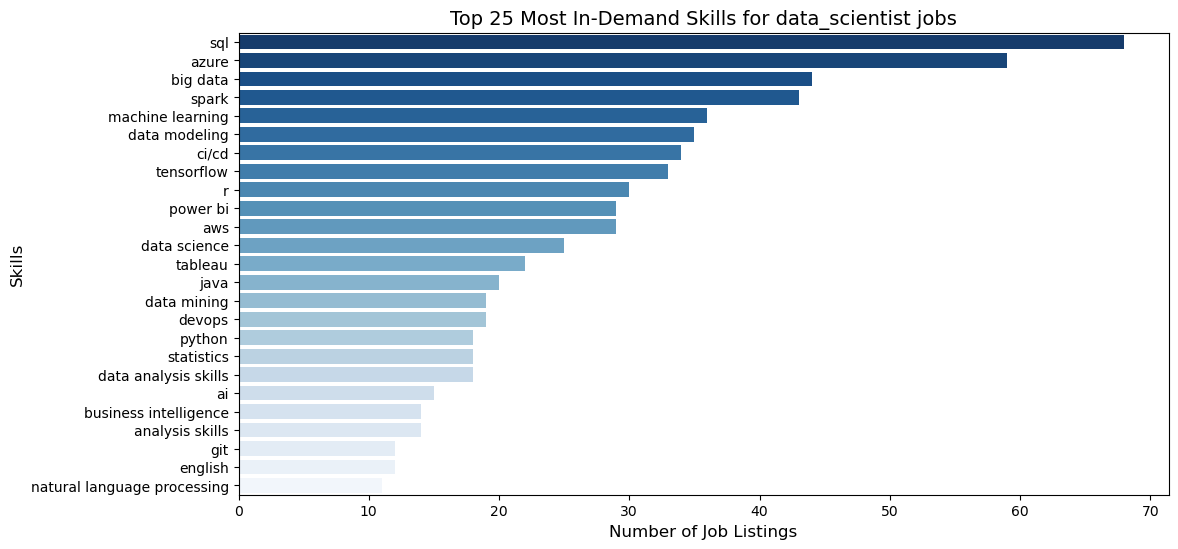

In [77]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [79]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                 company_name  salary_lpa
76                     Indeed        62.0
44              DPR Solutions        48.0
109  Navit Software Solutions        48.0
120          Procter & Gamble        48.0
94       Koch Global Services        48.0
102                    Micron        48.0
10                Aganitha AI        48.0
176                  mindcurv        48.0
4      AMNEX INFOTECHNOLOGIES        42.0
79                   Infogain        42.0


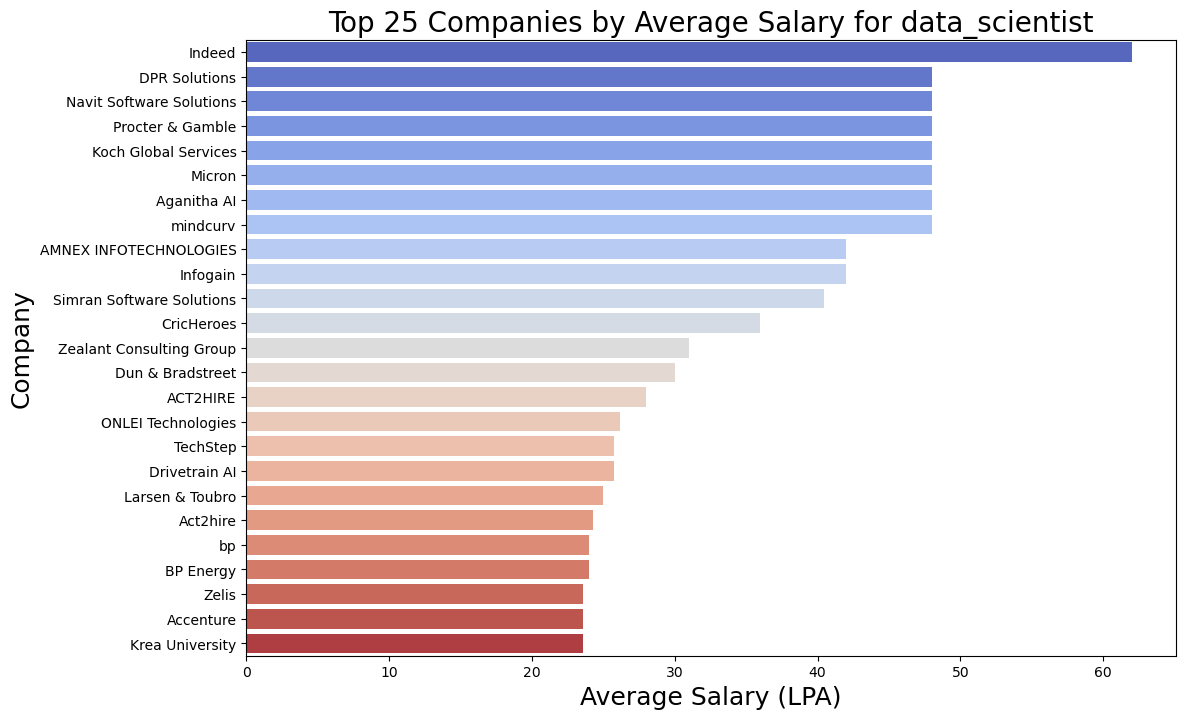

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

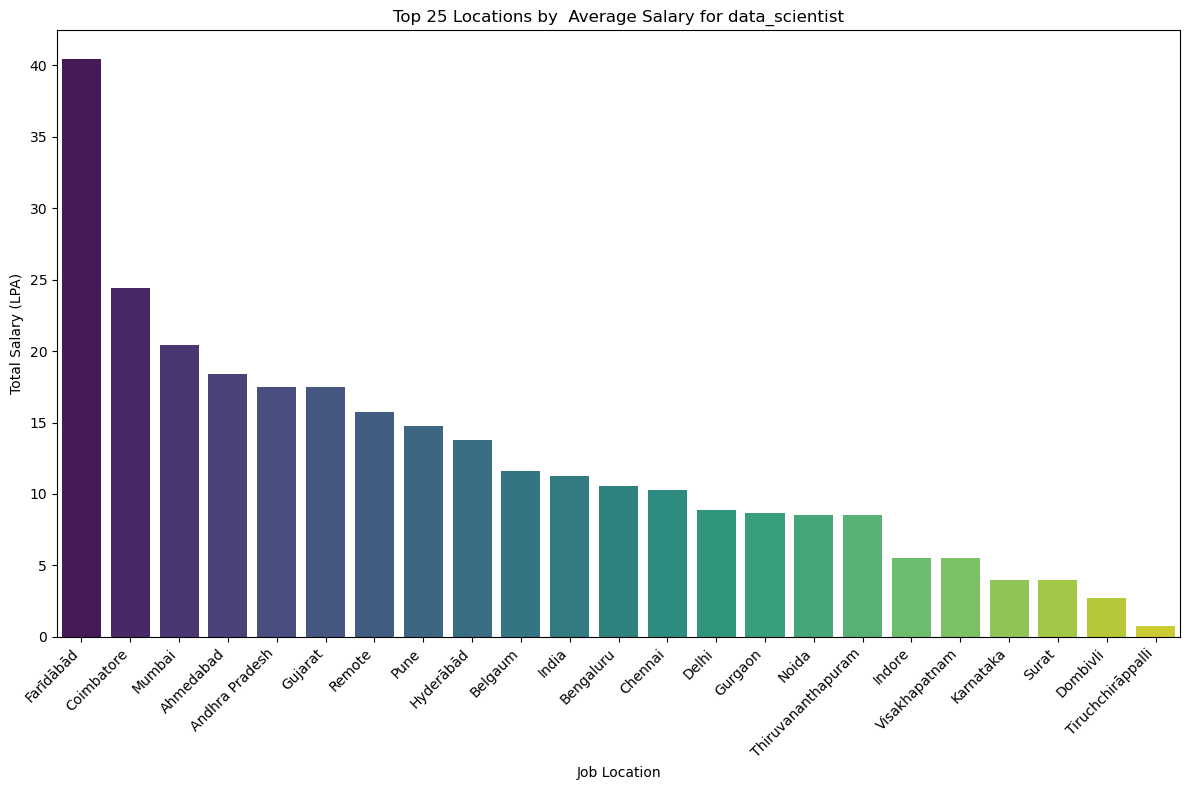

In [82]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

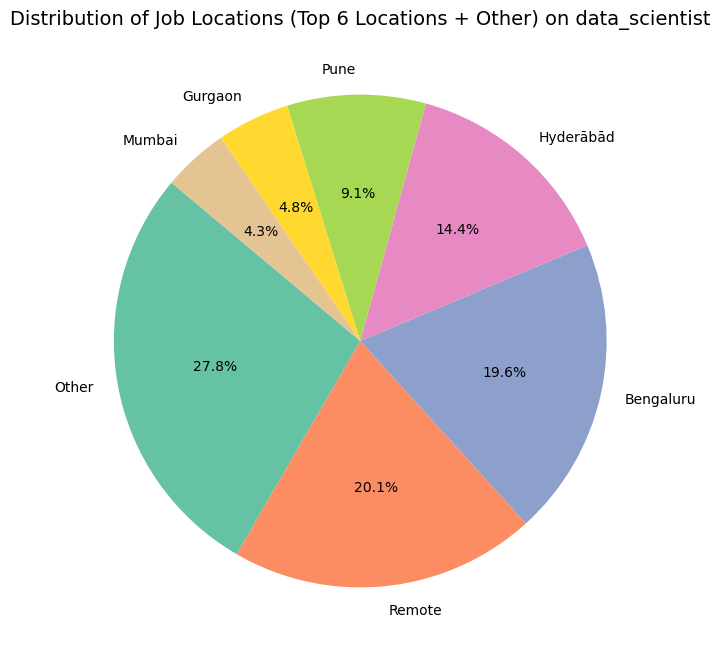

In [83]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

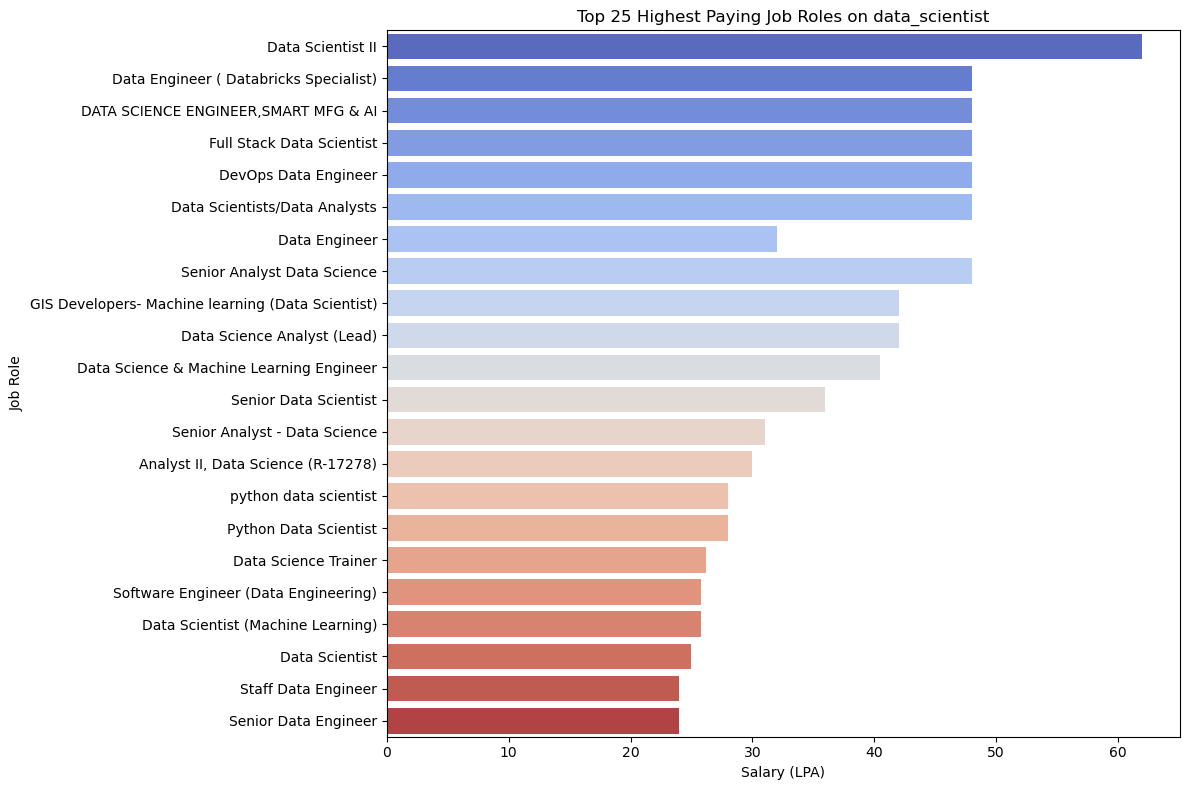

In [85]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [87]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_27164\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


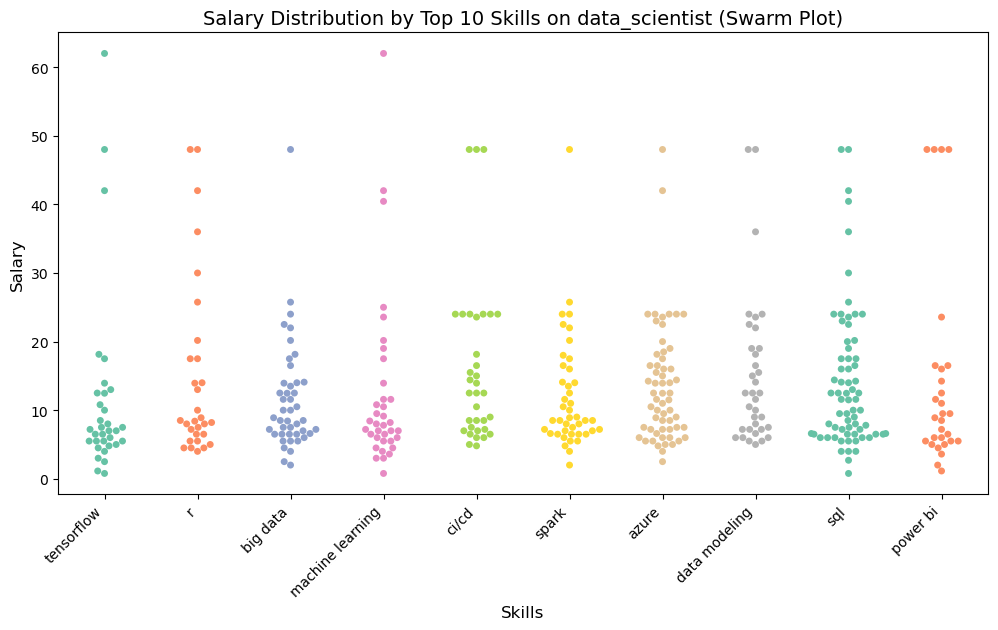

In [88]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

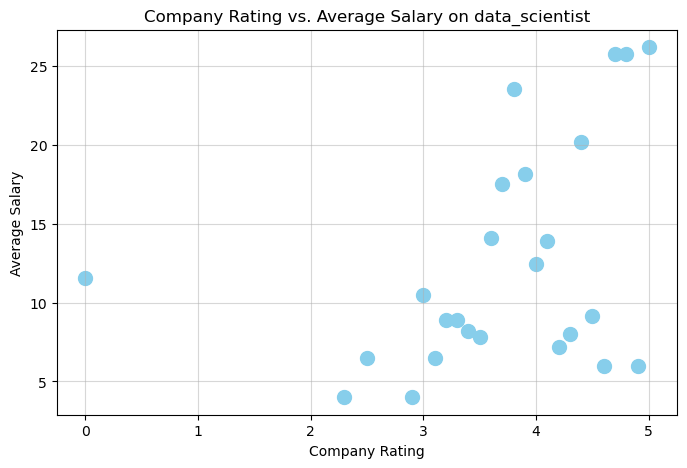

In [90]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [91]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.16098041635806248